<a href="https://colab.research.google.com/github/LeonelOctavio/Actividad2/blob/main/sign_mnlist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Cargar los datos del archivo CSV
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [2]:
# Separar las características y las etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [3]:
X_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [4]:
y_train

array([ 3,  6,  2, ..., 18, 17, 23])

In [5]:
X_test

array([[149, 149, 150, ..., 112, 120, 107],
       [126, 128, 131, ..., 184, 182, 180],
       [ 85,  88,  92, ..., 225, 224, 222],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]])

In [6]:
y_test

array([ 6,  5, 10, ...,  2,  4,  2])

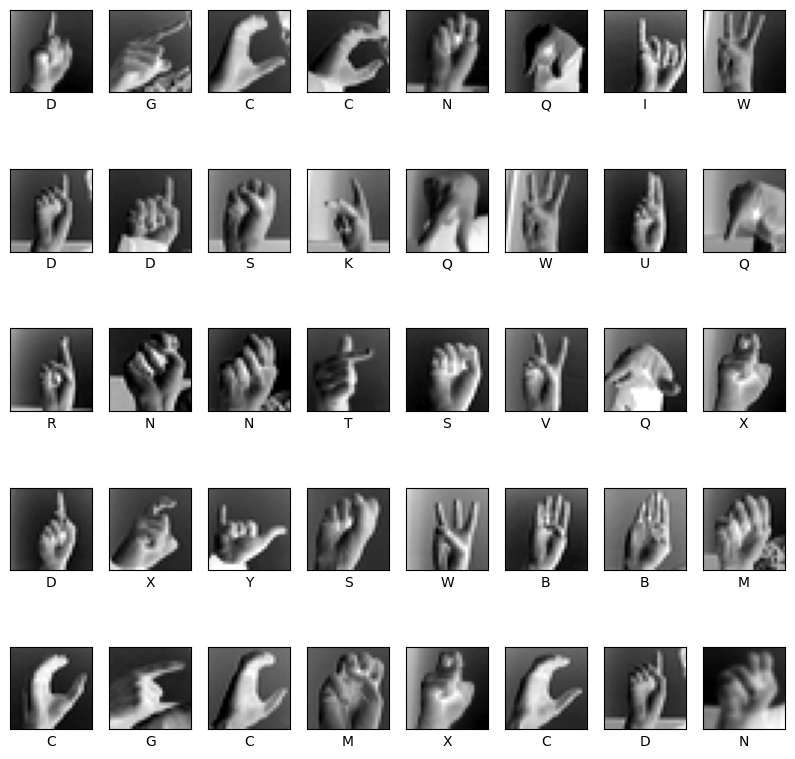

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV
train_data = pd.read_csv('sign_mnist_train.csv')

# Separar las características y las etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

# Etiquetas del alfabeto de señas (A-Z)
labels = [chr(label + 65) for label in range(26)]

plt.figure(figsize=(10, 10))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()


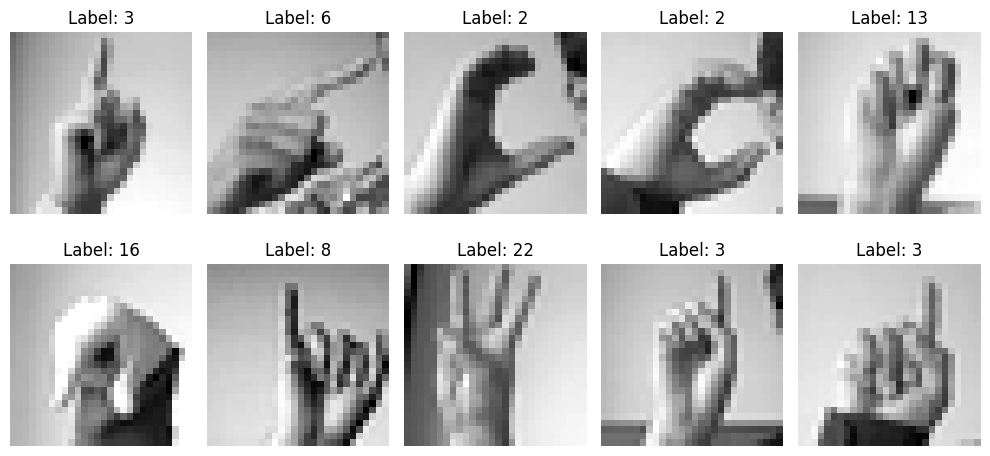

In [8]:
# Visualización de algunas imágenes del conjunto de entrenamiento
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

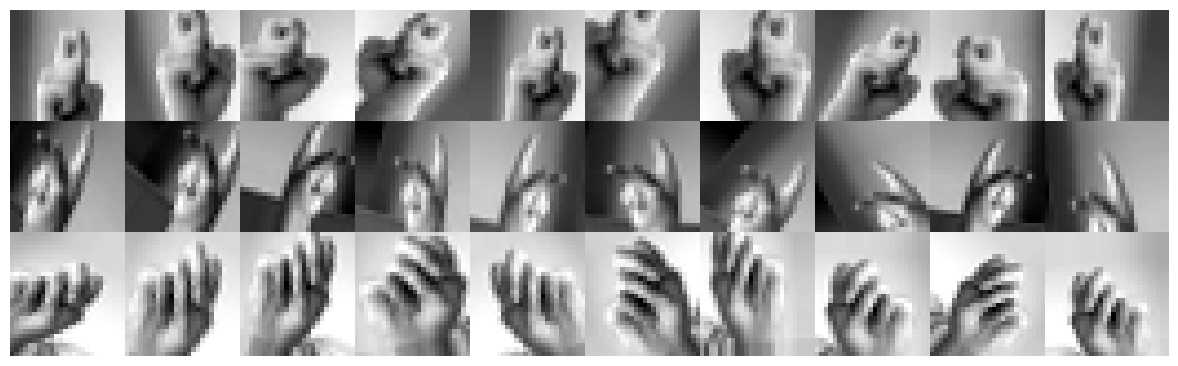

In [63]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Crear un generador de imágenes aumentadas
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Crear etiquetas categóricas para las clases
y_train_cat = to_categorical(y_train, num_classes=25)  # Corregir num_classes

# Previsualización de imágenes aumentadas
sample_index = 23  # Índice de la muestra de entrenamiento
X_train_sample = X_train[sample_index].reshape((1, 28, 28, 1))
Y_train_sample = y_train_cat[sample_index].reshape((1, 25))  # Corregir num_classes

plt.figure(figsize=(15, 4.5))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    X_train_aug, Y_train_aug = datagen.flow(X_train_sample, Y_train_sample).next()
    plt.imshow(X_train_aug[0].reshape((28, 28)), cmap='gray')
    plt.axis('off')

    # Cambiar la muestra de entrenamiento cada 10 imágenes
    if i == 9:
        sample_index = 11
        X_train_sample = X_train[sample_index].reshape((1, 28, 28, 1))
        Y_train_sample = y_train_cat[sample_index].reshape((1, 25))  # Corregir num_classes
    if i == 19:
        sample_index = 18
        X_train_sample = X_train[sample_index].reshape((1, 28, 28, 1))
        Y_train_sample = y_train_cat[sample_index].reshape((1, 25))  # Corregir num_classes

plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()


In [9]:
# Crear etiquetas binarias para clasificador "O vs not-O"
y_train_o = (y_train == 15)  # 15 representa la letra 'O'
y_test_o = (y_test == 15)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el clasificador RandomForest
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train_o)  # y_train_o contiene las etiquetas de "O vs. no O"

# Realizar predicciones en el conjunto de prueba
y_pred = forest_clf.predict(X_test)

# Calcular el accuracy score
accuracy = accuracy_score(y_test_o, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")


Accuracy Score: 0.9918


In [10]:
# Crear y entrenar el clasificador SGD
sgd_clf = SGDClassifier(max_iter=1000, tol=0.00001, random_state=42)
sgd_clf.fit(X_train, y_train_o)

SGDClassifier(random_state=42, tol=1e-05)

In [61]:
# Clasificar la categoría del valor de some_digit
some_digit = X_train[2230]
predicted_class = sgd_clf.predict([some_digit])

print(f"Predicted Class: {predicted_class[0]}")


Predicted Class: True


In [11]:
# Realizar k-fold cross validation y obtener el accuracy score
accuracy_scores = cross_val_score(sgd_clf, X_train, y_train_o, cv=5, scoring='accuracy')
mean_accuracy = np.mean(accuracy_scores)

In [13]:
# Validación cruzada y almacenamiento de predicciones
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_o, cv=5)

In [15]:
# Métricas de rendimiento
precision = precision_score(y_train_o, y_train_pred)
recall = recall_score(y_train_o, y_train_pred)
f1 = f1_score(y_train_o, y_train_pred)

# **Prueba individual de la "O"**

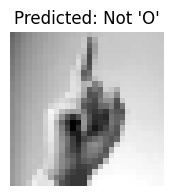

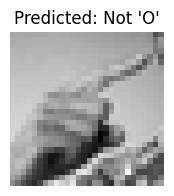

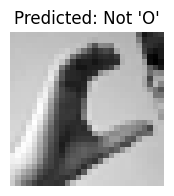

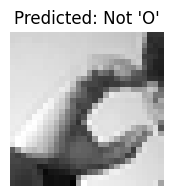

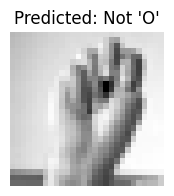

In [21]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

# Crear y entrenar el clasificador SGD
sgd_clf = SGDClassifier(max_iter=1000, tol=0.00001, random_state=42)
sgd_clf.fit(X_train, y_train_o)  # y_train_o contiene las etiquetas de "O vs. no O"

# Realizar predicciones en algunas pruebas y mostrar imágenes con predicciones
num_samples_to_check = 5
samples_to_check = X_train[:num_samples_to_check]

for i, sample in enumerate(samples_to_check):
    predicted_class = sgd_clf.predict([sample])[0]

    plt.figure(figsize=(2, 2))
    plt.imshow(sample.reshape(28, 28), cmap='gray')

    if predicted_class:
        title = "Predicted: 'O'"
    else:
        title = "Predicted: Not 'O'"

    plt.title(title)
    plt.axis('off')
    plt.show()


# **PRUEBAS RANDOM**

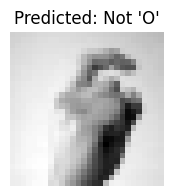

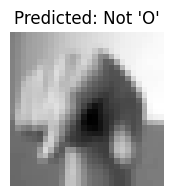

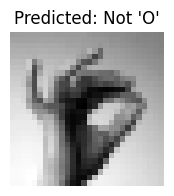

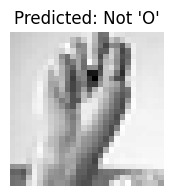

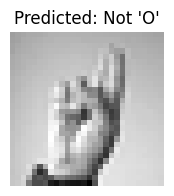

In [42]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np

# Crear y entrenar el clasificador SGD
sgd_clf = SGDClassifier(max_iter=1000, tol=0.00001, random_state=42)
sgd_clf.fit(X_train, y_train_o)  # y_train_o contiene las etiquetas de "O vs. no O"

# Generar índices aleatorios para seleccionar muestras
random_indices = np.random.choice(len(X_train), num_samples_to_check, replace=False)

# Realizar predicciones en muestras aleatorias y mostrar imágenes con predicciones
for i in random_indices:
    sample = X_train[i]
    predicted_class = sgd_clf.predict([sample])[0]

    plt.figure(figsize=(2, 2))
    plt.imshow(sample.reshape(28, 28), cmap='gray')

    if predicted_class:
        title = "Predicted: 'O'"
    else:
        title = "Predicted: Not 'O'"

    plt.title(title)
    plt.axis('off')
    plt.show()


# **PRUEBA GENERAL**

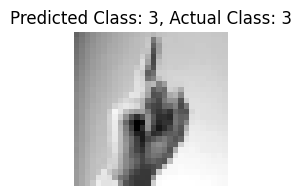

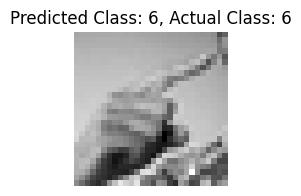

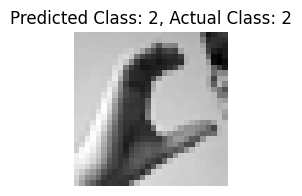

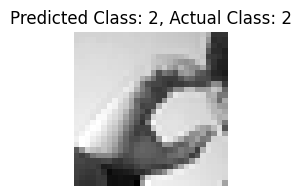

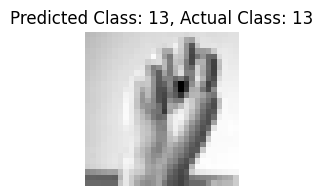

In [17]:
# Crear y entrenar el clasificador SGD para clasificación multiclase
sgd_clf = SGDClassifier(max_iter=1000, tol=0.00001, random_state=42)
sgd_clf.fit(X_train, y_train)

# Realizar predicciones en algunas pruebas y mostrar imágenes con predicciones
num_samples_to_check = 5
samples_to_check = X_train[:num_samples_to_check]

for i, sample in enumerate(samples_to_check):
    predicted_class = sgd_clf.predict([sample])[0]
    actual_class = y_train[i]

    plt.figure(figsize=(2, 2))
    plt.imshow(sample.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Class: {predicted_class}, Actual Class: {actual_class}")
    plt.axis('off')
    plt.show()


In [37]:
# Importar las bibliotecas necesarias
import pandas as pd

# Cargar los datos del archivo CSV
train_data = pd.read_csv('sign_mnist_train.csv')

# Mostrar las etiquetas de las primeras 10 muestras
print("Etiquetas de las primeras 10 muestras:")
print(train_data.iloc[:10, 0].values)


Etiquetas de las primeras 10 muestras:
[ 3  6  2  2 13 16  8 22  3  3]


In [38]:
# Resultados
print("Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy Scores: [0.9989073  1.         0.99963577 0.99981788 0.99963577]
Mean Accuracy: 0.9995993443817156
Precision: 0.9954001839926403
Recall: 0.9944852941176471
F1 Score: 0.9949425287356322


# **GRAFICAS**

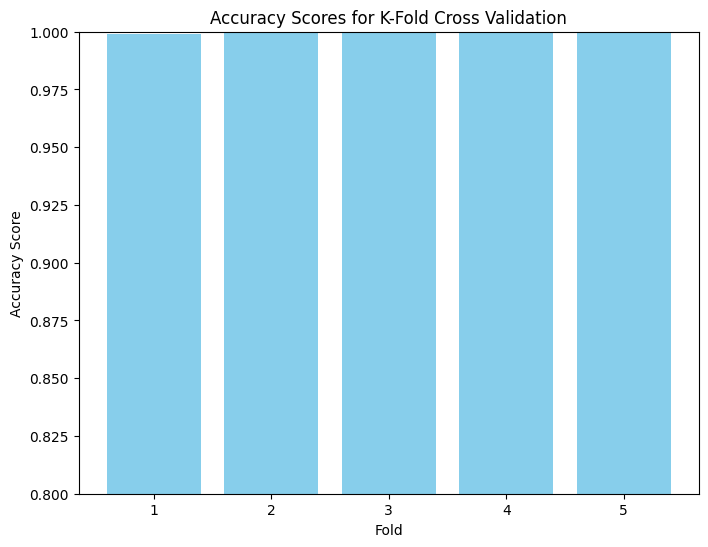

In [36]:
# Visualización de resultados
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), accuracy_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for K-Fold Cross Validation')
plt.ylim([0.8, 1.0])
plt.xticks(range(1, 6))
plt.show()

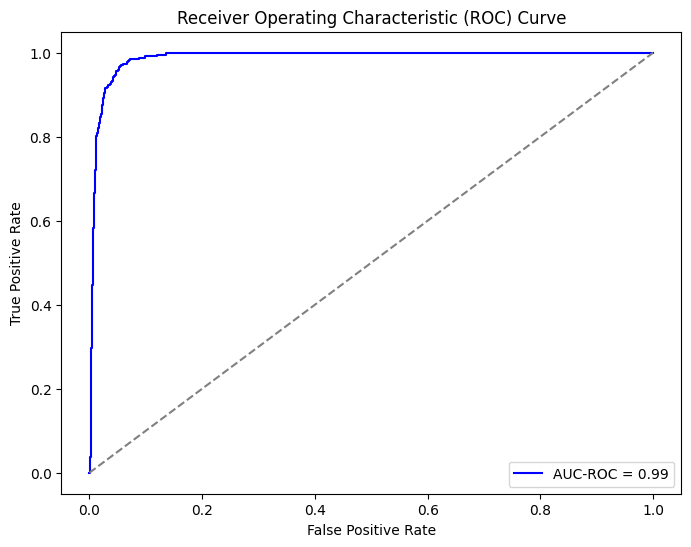

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Calcular las probabilidades de las clases positivas
y_scores = sgd_clf.decision_function(X_test)

# Calcular la curva ROC y el área bajo la curva (AUC-ROC)
fpr, tpr, thresholds_roc = roc_curve(y_test_o, y_scores)
roc_auc = auc(fpr, tpr)

# Calcular la curva de precisión-recall y el área bajo la curva (AUC-PR)
precision, recall, thresholds_pr = precision_recall_curve(y_test_o, y_scores)
pr_auc = auc(recall, precision)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


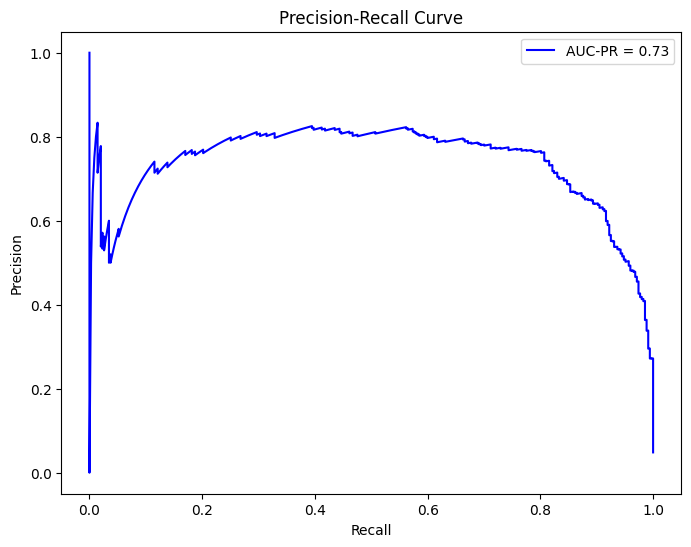

In [68]:
# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'AUC-PR = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()